# EE 511 Assignment 2 - PartII
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [43]:
import tools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## \[Step 3\] Load training, validation and testing data

In [59]:
train, valid, test = tools.load_data()

## \[Step 4\] One variable least squares linear regression 

In [60]:
area_label = 'Gr Liv Area'
price_label = 'SalePrice'

area_train = train[area_label].to_numpy()
area_valid = valid[area_label].to_numpy()
area_test = test[area_label].to_numpy()
price_train = train[price_label].to_numpy()
price_valid = valid[price_label].to_numpy()
price_test = test[price_label].to_numpy()

In [61]:
weights = tools.calculate_OLS(area_train, price_train)

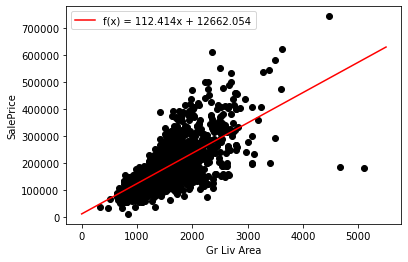

In [62]:
x = np.linspace(0, 5500, 100)
y = weights[0] * x + weights[1]

plt.xlabel(area_label)
plt.ylabel(price_label)
plt.plot(area_train, price_train, 'o', color='black')
plt.plot(x, y, '-r', label="f(x) = %.3fx + %.3f" % (weights[0], weights[1]))
plt.legend()

In [63]:
price_predicted = tools.predict(np.array(area_valid), weights)
print("RMSE = $%.2f" % (tools.rmse(price_valid, price_predicted)))

RMSE = $56299.05


## \[Step 5\] Adding more features to the simple model

In [64]:
train_without_price = train.drop(price_label, 1).to_numpy()
weights = tools.calculate_OLS(train_without_price, price_train)

In [65]:
valid_without_price = valid.drop(price_label, 1).to_numpy()
price_predicted = tools.predict(valid_without_price, weights)
print("RMSE = $%.2f" % (tools.rmse(price_valid, price_predicted)))

RMSE = $26191.88


## \[Step 6\] Adding L1 regularization